In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import string 
from collections import Counter
import spacy
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from gensim import corpora, models
import os
import csv

<h1>Python7 Аналіз текстів</h1>

Основне завдання
Дані для виконання: текстові дані у форматі csv-файлів або дані з відкритих джерел (телеграм-канали, RSS-канали тощо). Приклад даних: 
https://drive.google.com/drive/folders/17Qnj87hJWpI20CK_7sYPzQ9jguQBZm25 (ukr_text.csv)

Нормалізація та попередня обробка даних: 
- Провести очищення текстових даних від стоп-слів/тегів/розмітки.
- Виконати токенізацію текстових елементів. 
- Провести лематизацію текстових елементів (можна використати бібліотеку Spacy - приклад роботи https://github.com/d9nchik/tokenizer_example). Зберегти результат в окремий файл.
- Створити Bag of Words для всіх нормалізованих слів. Зберегти результат в окремий файл.
- Порахувати метрику TF-IDF для 10 слів, що найчастіше зустрічаються в корпусі;

In [2]:
# import data 

df = pd.read_csv('data/ukr_text.csv')
df.head(10)

,Id,Title,Body
0,http://k.img.com.ua/rss/ua/4013798,Кличко покликав німецьких інвесторів до Києва,Київ - перспективний і відкритий ринок для біз...
1,http://k.img.com.ua/rss/ua/4001679,"З'явилося відео, як байкер почав стріляти у во...",З'явилося відео конфлікту між мотоциклістом...
2,http://k.img.com.ua/rss/ua/4001390,У центрі Києва посеред вулиці помер чоловік,У Києві на Бессарабській площі вранці в четвер...
3,http://k.img.com.ua/rss/ua/4001239,Нічний ураган перетворив Хрещатик на смітник,Київ вночі 16 серпня пережив найсильнішу грозу...
4,http://k.img.com.ua/rss/ua/4001227,Потоп у Києві: столицю накрив ураган з градом,Уночі Київ вкотре накрила негода. Найсильніший...
5,http://k.img.com.ua/rss/ua/4001167,У Києві потрапив в ДТП екс-нардеп Мірошниченко,Колишній народний депутат від партії Свобода І...
6,http://k.img.com.ua/rss/ua/3999827,У Києві пограбували ювелірний магазин і застре...,У Києві троє невідомих пограбували ювелірний м...
7,http://k.img.com.ua/rss/ua/3999524,У Києві обмежать рух Північним мостом,"У Києві на вихідних, 11-12 серпня, буде обмеже..."
8,http://k.img.com.ua/rss/ua/3999429,"У Києві ""замінували"" майдан Незалежності",На майдані Незалежності в Києві шукають вибухі...
9,http://k.img.com.ua/rss/ua/3999418,У Києві посилять заходи безпеки 10 і 12 серпня,У Києві у зв'язку з проведенням футбольних мат...


In [3]:
df.drop(['Id'], axis=1, inplace=True)
df.head(10)

,Title,Body
0,Кличко покликав німецьких інвесторів до Києва,Київ - перспективний і відкритий ринок для біз...
1,"З'явилося відео, як байкер почав стріляти у во...",З'явилося відео конфлікту між мотоциклістом...
2,У центрі Києва посеред вулиці помер чоловік,У Києві на Бессарабській площі вранці в четвер...
3,Нічний ураган перетворив Хрещатик на смітник,Київ вночі 16 серпня пережив найсильнішу грозу...
4,Потоп у Києві: столицю накрив ураган з градом,Уночі Київ вкотре накрила негода. Найсильніший...
5,У Києві потрапив в ДТП екс-нардеп Мірошниченко,Колишній народний депутат від партії Свобода І...
6,У Києві пограбували ювелірний магазин і застре...,У Києві троє невідомих пограбували ювелірний м...
7,У Києві обмежать рух Північним мостом,"У Києві на вихідних, 11-12 серпня, буде обмеже..."
8,"У Києві ""замінували"" майдан Незалежності",На майдані Незалежності в Києві шукають вибухі...
9,У Києві посилять заходи безпеки 10 і 12 серпня,У Києві у зв'язку з проведенням футбольних мат...


<h3>Провести очищення текстових даних від стоп-слів/тегів/розмітки.</h3>

In [4]:
# delete tags 

def del_tags(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup.get_text()

# Застосування функції до колонок 'Title' та 'Body' у DataFrame
df['Title'] = df['Title'].apply(del_tags)
df['Body'] = df['Body'].apply(del_tags)

C:\Users\oksan\AppData\Local\Temp\ipykernel_16164\582745747.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html_content, 'html.parser')


In [5]:
stop_words = pd.read_csv("data/ukrainian_stopwords.csv", encoding='cp1251')
stop_words.head(5)

,stopword
0,в
1,у
2,не
3,що
4,він


In [6]:
num_unique_stopwords = stop_words['stopword'].nunique()
num_total_stopwords = len(stop_words)
print(f"\nNumber of unique stop words before duplicates removal: {num_unique_stopwords}")
print(f"Total number of stop words before duplicates removal: {num_total_stopwords}")


Number of unique stop words before duplicates removal: 426
Total number of stop words before duplicates removal: 869


In [7]:
stop_words = stop_words.drop_duplicates()
num_unique_stopwords = stop_words['stopword'].nunique()
num_total_stopwords = len(stop_words)
print(f"\nNumber of unique stop words: {num_unique_stopwords}")
print(f"Total number of stop words: {num_total_stopwords}")




Number of unique stop words: 426
Total number of stop words: 426


In [8]:
# Завантаження стоп-слів
# stop_words = pd.read_csv('data/ukrainian_stopwords.csv', encoding='cp1251')
stop_words_set = set(stop_words['stopword'])

# Додавання додаткових стоп-слів
# additional_stop_words = {'а', 'я', 'яку', 'яких', 'це', 'ми', 'і', 'од', 'же', 'ви', 'уже', 'што', 'би'}
# stop_words_set.update(additional_stop_words)

# Видалення стоп-слів та чисел
def del_stopwords_and_numbers(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stop_words_set and not word.isdigit()]
    return " ".join(cleaned_words)

df['Title'] = df['Title'].apply(del_stopwords_and_numbers)
df['Body'] = df['Body'].apply(del_stopwords_and_numbers)

<h3>Хмари слів після очистки:</h3>

In [9]:
def plot_cloud(text, title):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

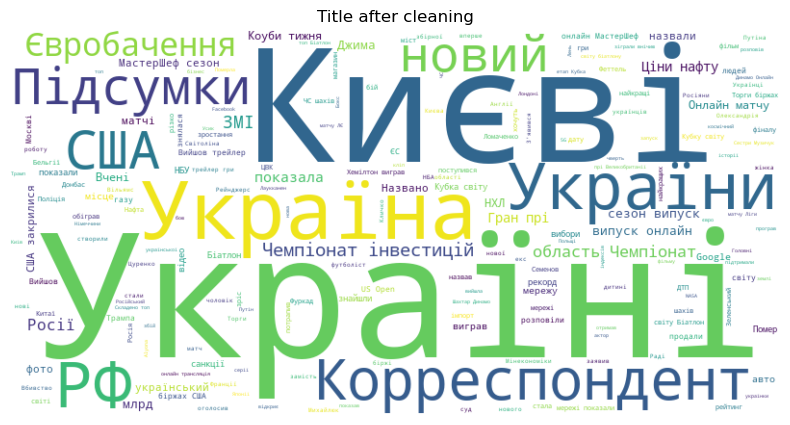

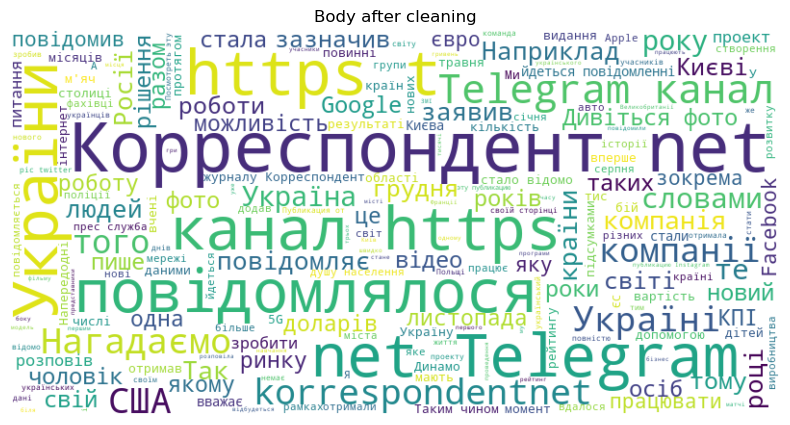

In [10]:
# Generate and plot word clouds
text = " ".join(df['Title'])
plot_cloud(text, "Title after cleaning")

text = " ".join(df['Body'])
plot_cloud(text, "Body after cleaning")

<h3>Виконати токенізацію текстових елементів та провести лематизацію текстових елементів</h3>

In [11]:
# Завантаження української моделі spaCy
nlp = spacy.load("uk_core_news_sm")

# Функція токенізації та лематизації
def tokenize_and_lemmatize(text):
    lemmatized_words = [token.lemma_.lower() for token in nlp(text.translate(str.maketrans('', '', punctuation + '«»—–’')))]
    return [word for word in lemmatized_words if word not in nlp.Defaults.stop_words and re.match(r"\w", word)]

# Токенізація та лематизація колонок 'Title' та 'Body'
df['Title_tokens'] = df['Title'].apply(tokenize_and_lemmatize)
df['Body_tokens'] = df['Body'].apply(tokenize_and_lemmatize)

# Виведення перших рядків для перевірки
print(df[['Title', 'Title_tokens']].head())
print(df[['Body', 'Body_tokens']].head())

                                               Title  \
0         Кличко покликав німецьких інвесторів Києва   
1  З'явилося відео, байкер почав стріляти водія а...   
2                  центрі Києва вулиці помер чоловік   
3          Нічний ураган перетворив Хрещатик смітник   
4          Потоп Києві: столицю накрив ураган градом   

                                        Title_tokens  
0     [кличко, покликати, німецький, інвестор, київ]  
1  [зявитися, відео, байкер, почати, стріляти, во...  
2            [центр, київ, вулиця, померти, чоловік]  
3   [нічний, ураган, перетворити, хрещатик, смітник]  
4       [потоп, кий, столиця, накрити, ураган, град]  
                                                Body  \
0  Київ - перспективний відкритий ринок бізнесу і...   
1  З'явилося відео конфлікту мотоциклістом водієм...   
2  Києві Бессарабській площі вранці четвер, серпн...   
3  Київ вночі серпня пережив найсильнішу грозу зл...   
4  Уночі Київ вкотре накрила негода. Найсильніший... 

In [12]:
path = "data/tokenized_and_lemmatized_data.csv"

# Save the results to a CSV file
df.to_csv(path, index=False)

# Print a message to confirm
print(f"Tokenized and lemmatized data saved to '{path}'")

Tokenized and lemmatized data saved to 'data/tokenized_and_lemmatized_data.csv'


<h3>Створити Bag of Words для всіх нормалізованих слів. Зберегти результат в окремий файл.</h3>

In [13]:
# Combine Title_tokens and Body_tokens into a single column
df['Combined_tokens'] = df['Title_tokens'] + df['Body_tokens']

# Convert the token lists back to space-separated strings
df['Combined_tokens'] = df['Combined_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the combined tokens
bag_of_words = vectorizer.fit_transform(df['Combined_tokens'])

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the bag of words matrix to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

# Display the bag of words DataFrame
bag_of_words_df


,00,000,0000,00020,001,0010,0011,002,0029,003,...,ґрунт,ґрунтовий,ґрунтовний,ґрунтовно,ґрунтуватись,ґрунтуватися,ґудзик,ґула,ґю,ґюї
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Save the bag of words DataFrame to a CSV file
output_file_path = "data/bag_of_words_all.csv"
bag_of_words_df.to_csv(output_file_path, index=False)

# Display a message to confirm the file creation
print(f"Bag of Words for all normalized words saved to '{output_file_path}'")

Bag of Words for all normalized words saved to 'data/bag_of_words_all.csv'


<h3>Порахувати метрику TF-IDF для 10 слів, що найчастіше зустрічаються в корпусі. </h3>

In [15]:
# Об'єднання всіх токенів у один рядок
all_tokens_str = ' '.join(df['Combined_tokens'])

# Ініціалізація TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Підгонка та трансформація векторайзера до об'єднаних токенів
tfidf_matrix = tfidf_vectorizer.fit_transform([all_tokens_str])

# Отримання назв фіч (слів) з векторайзера
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Конвертація матриці TF-IDF у масив та її сплющення
tfidf_array = tfidf_matrix.toarray().flatten()

# Створення словника для зберігання TF-IDF оцінок для кожного слова
word_tfidf_dict = dict(zip(feature_names_tfidf, tfidf_array))

# Сортування словника за TF-IDF оцінками у порядку спадання
sorted_word_tfidf = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Вибір 10 слів з найвищими TF-IDF оцінками
top_10_tfidf_words = sorted_word_tfidf[:10]

# Виведення 10 слів з їх TF-IDF оцінками
print("Топ 10 слів з найвищими TF-IDF оцінками:")
for word, tfidf_score in top_10_tfidf_words:
    print(f"{word}: {tfidf_score}")

Топ 10 слів з найвищими TF-IDF оцінками:
україна: 0.3555013524742292
новий: 0.17595242036856792
компанія: 0.16128971867118727
український: 0.13058104153139002
країна: 0.12366467280621048
корреспондентnet: 0.12117478006514583
світ: 0.12062147056713148
стати: 0.12034481581812428
рок: 0.10374553087769335
сша: 0.10208560238365026


<h2>Додаткове завдання #1</h2> 

Інтелектуальний аналіз текстів (+1 бал):
- провести сантимент аналіз (визначення емоційної тональності – позитивний / негативний) для даних ukr_text.csv. Для визначення тональності можна використати як методи на основі словника тональності (https://github.com/lang-uk/tone-dict-uk) так і методи машинного навчання.  
- провести категоризацію (визначення категорій тексту) даних методом LDA. Використати не менше 10 категорій. Віднести текст до певної категорії. Вивести 5 найважливіших терма кожної категорії. Приклади роботи з LDA  наведено за посиланням 
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [16]:
def load_tone_dictionary(file_path):
    tone_dictionary = {}

    with open(file_path, 'r', encoding='utf-8') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        for row in reader:
            word, sentiment = row
            tone_dictionary[word] = sentiment

    return tone_dictionary

# Example usage:
tone_dict = load_tone_dictionary('data/tone-dict-uk.tsv')

In [17]:
def sentiment_analysis(text):
    tokens = tokenize_and_lemmatize(text)
    score = sum(tone_dict[tone_dict['word'].isin(tokens)]['tone'])
    if score > 0:
        return 'позитивний'
    elif score < 0:
        return 'негативний'
    else:
        return 'нейтральний'

In [18]:
# Видалення колонки 'Combined_tokens'
df = df.drop(columns=['Combined_tokens'])

In [19]:
def calculate_sentiment(words, dictionary):
    sentiment_score = 0
    for word in words:
        if word in dictionary:
            sentiment_score += int(dictionary[word])
    return sentiment_score

df['Title tone'] = df['Title_tokens'].apply(lambda tokens: calculate_sentiment(tokens,  tone_dict))
df['Body tone'] = df['Body_tokens'].apply(lambda tokens: calculate_sentiment(tokens,  tone_dict))
df.head()

,Title,Body,Title_tokens,Body_tokens,Title tone,Body tone
0,Кличко покликав німецьких інвесторів Києва,Київ - перспективний відкритий ринок бізнесу і...,"[кличко, покликати, німецький, інвестор, київ]","[київ, перспективний, відкритий, ринок, бізнес...",0,9
1,"З'явилося відео, байкер почав стріляти водія а...",З'явилося відео конфлікту мотоциклістом водієм...,"[зявитися, відео, байкер, почати, стріляти, во...","[зявитися, відео, конфлікт, мотоцикліст, водій...",-1,-8
2,центрі Києва вулиці помер чоловік,"Києві Бессарабській площі вранці четвер, серпн...","[центр, київ, вулиця, померти, чоловік]","[кий, бессарабський, площа, вранці, четвер, се...",-1,-7
3,Нічний ураган перетворив Хрещатик смітник,Київ вночі серпня пережив найсильнішу грозу зл...,"[нічний, ураган, перетворити, хрещатик, смітник]","[київ, вночі, серпень, пережити, найсильніший,...",0,-3
4,Потоп Києві: столицю накрив ураган градом,Уночі Київ вкотре накрила негода. Найсильніший...,"[потоп, кий, столиця, накрити, ураган, град]","[уночі, київ, вкотре, накрити, негода, найсиль...",0,-1


In [20]:
def add_category(tone):
    if tone < -30:
        return "Дуже негативна"
    elif tone > 30:
        return "Дуже позитивна"
    elif -30 <= tone < -5:
        return "Негативна"
    elif 5 < tone < 30:
        return "Позитивна"
    elif tone == 0:
        return "Абсолютно нейтральна"
    elif -5 <= tone < 5:
        return "Майже нейтральна"

# Додавання нового стовпчика
df['Tone Category'] = df['Body tone'].apply(add_category)
df.head()

,Title,Body,Title_tokens,Body_tokens,Title tone,Body tone,Tone Category
0,Кличко покликав німецьких інвесторів Києва,Київ - перспективний відкритий ринок бізнесу і...,"[кличко, покликати, німецький, інвестор, київ]","[київ, перспективний, відкритий, ринок, бізнес...",0,9,Позитивна
1,"З'явилося відео, байкер почав стріляти водія а...",З'явилося відео конфлікту мотоциклістом водієм...,"[зявитися, відео, байкер, почати, стріляти, во...","[зявитися, відео, конфлікт, мотоцикліст, водій...",-1,-8,Негативна
2,центрі Києва вулиці помер чоловік,"Києві Бессарабській площі вранці четвер, серпн...","[центр, київ, вулиця, померти, чоловік]","[кий, бессарабський, площа, вранці, четвер, се...",-1,-7,Негативна
3,Нічний ураган перетворив Хрещатик смітник,Київ вночі серпня пережив найсильнішу грозу зл...,"[нічний, ураган, перетворити, хрещатик, смітник]","[київ, вночі, серпень, пережити, найсильніший,...",0,-3,Майже нейтральна
4,Потоп Києві: столицю накрив ураган градом,Уночі Київ вкотре накрила негода. Найсильніший...,"[потоп, кий, столиця, накрити, ураган, град]","[уночі, київ, вкотре, накрити, негода, найсиль...",0,-1,Майже нейтральна


In [21]:
# Побудова словника
texts = df['Body_tokens']  # Використання вже токенізованих текстів
dictionary = corpora.Dictionary(texts)  # Побудова словника

# Побудова корпусу
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics = 10
# Проведення LDA
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Виведення 5 найважливіших термів для кожної категорії
topics = lda_model.show_topics(num_topics=num_topics, num_words=5)
for topic in topics:
    print(topic)

(0, '0.007*"україна" + 0.006*"новий" + 0.005*"робота" + 0.004*"компанія" + 0.003*"кпі"')
(1, '0.005*"мяч" + 0.005*"олександрія" + 0.005*"штрафний" + 0.004*"україна" + 0.004*"партія"')
(2, '0.016*"україна" + 0.006*"грудень" + 0.005*"росія" + 0.005*"долар" + 0.005*"президент"')
(3, '0.006*"область" + 0.005*"україна" + 0.005*"компанія" + 0.005*"регіон" + 0.005*"бій"')
(4, '0.003*"росія" + 0.003*"стати" + 0.003*"україна" + 0.003*"чоловік" + 0.002*"компанія"')
(5, '0.008*"матч" + 0.005*"дитина" + 0.005*"гра" + 0.005*"україна" + 0.004*"шахтар"')
(6, '0.007*"україна" + 0.005*"пункт" + 0.004*"g" + 0.004*"індекс" + 0.004*"компанія"')
(7, '0.007*"компанія" + 0.005*"гра" + 0.005*"новий" + 0.004*"google" + 0.003*"стати"')
(8, '0.007*"10" + 0.006*"11" + 0.005*"2" + 0.005*"00" + 0.005*"01"')
(9, '0.004*"долар" + 0.004*"фото" + 0.004*"instagram" + 0.003*"зірка" + 0.003*"шоу"')


In [22]:
# Функція для визначення категорії тексту на основі LDA
def assign_category(lda_model, text):
    text_bow = dictionary.doc2bow(text)
    topic_distribution = lda_model.get_document_topics(text_bow)
    main_topic = max(topic_distribution, key=lambda x: x[1])[0]
    return main_topic

# Додавання нового стовпчика 'Category' до DataFrame
df['Category'] = df['Body_tokens'].apply(lambda tokens: assign_category(lda_model, tokens))

# Виведення результату
df[['Body', 'Category']].head()

,Body,Category
0,Київ - перспективний відкритий ринок бізнесу і...,3
1,З'явилося відео конфлікту мотоциклістом водієм...,2
2,"Києві Бессарабській площі вранці четвер, серпн...",4
3,Київ вночі серпня пережив найсильнішу грозу зл...,3
4,Уночі Київ вкотре накрила негода. Найсильніший...,2


<h2>Додаткове завдання #2</h2> 

Обробка даних творів Михайла Коцюбинського та Михайла Старицького   (+1 бал):
- Завантажити оповідання Михайла Коцюбинського та Михайла Старицького з папки "Класична література" https://drive.google.com/drive/folders/1SmAehfpKpzw-HpILdtg8Pk9Jn64_dId3
- Виконати попередню обробку текстів.
- Побудувати дві хмари слів, що використовують М. Коцюбинський та М. Старицький.
- Який з письменників написав більш похмурі оповідання?

In [23]:
# Функція для зчитування тексту з файлу
def read_text(file_path, encoding):
    with open(file_path, 'r', encoding=encoding) as file:
        text = file.read()
    return text

In [24]:
folder_path = "data/"

# Завантаження та обробка оповідання Михайла Старицького
staritsky_file_path = os.path.join(folder_path, 'za-dvoma-zaytsiamy1341.txt')
staritsky_text = read_text(staritsky_file_path, 'cp1251')

# staritsky_text

In [25]:
staritsky_text = staritsky_text.lower()

# Apply replacements
replacements = {
    'п р о к і п': 'прокіп',
    'с в и р и д о в и ч': 'свиридович',
    'я в д о к і я': 'явдокія',
    'п и л и п і в н а': 'пилипівна',
    'п р о н я': 'проня',
    'с е к л и т а': 'секлита',
    'г а л я': 'галя',
    'г о л о х в о с т и й': 'голохвистий',
    'н а с т я': 'настя',
    'н а т а л к а': 'наталка',
    'x и м к а': 'химка',
    'п и д о р а': 'пидора',
    'с т е п а н': 'степан',
    'г л е й т ю к': 'глейтюк',
    'м а р т а': 'марта',
    'у с т я': 'устя',
    'д в а б а с и': 'два баси',
    'м е р о н і я': 'меронія',
    'й о с ь к а': 'йоська',
    'к в а р т а л ь н и й': 'квартальний',
    'к а т е р и н щ и к': 'катеринщик',
    'м і щ а н е': 'міщане',
    'л ю д': 'люд',
    '1-й б а с': '1-й бас',
    '2-й б а с': '2-й бас',
    'ж и д': 'жид',
    'с і р к о': 'сірко',
    'м і щ а н к и': 'міщанки',
    'м і щ а н є': 'міщанє',
    'г о с т і': 'гості',
    'д р у г і': 'другі',
    'п а р у б о к': 'парубок',
    'г о л о с': 'голос',
    'д і в ч и н а': 'дівчина',
    'у с і': 'усі',
    'в с і': 'всі',
    'д е х т о': 'дехто',
    'х л о п е ц ь': 'хлопець'
}

for old, new in replacements.items():
    staritsky_text = staritsky_text.replace(old, new)

In [26]:
kotsiubynsky_file_path = os.path.join(folder_path, 'kotsiubynskyy-mykhaylo-mykhaylovych-tini-zabutykh-predkiv1058.html')
kotsiubynsky_text = read_text(kotsiubynsky_file_path, 'utf-8')

# kotsiubynsky_text

In [27]:
# Виконати попередню обробку текстів.
# tags 
staritsky_text = del_tags(staritsky_text)
kotsiubynsky_text = del_tags(kotsiubynsky_text)

# stopwords_and_numbers
staritsky_text = del_stopwords_and_numbers(staritsky_text)
kotsiubynsky_text = del_stopwords_and_numbers(kotsiubynsky_text)

In [28]:
# Tokenize and lemmatize the texts
staritsky_tokens = tokenize_and_lemmatize(staritsky_text)
kotsiubynsky_tokens = tokenize_and_lemmatize(kotsiubynsky_text)

In [29]:
# Define sentiment_analysis function to return sentiment score instead of string
def sentiment_analysis1(text, tone_dict):
    tokens = tokenize_and_lemmatize(text)
    score = sum(int(tone_dict.get(token, 0)) for token in tokens)
    return score

# Apply sentiment analysis and add sentiment category for Staritsky
staritsky_sentiment = sentiment_analysis1(staritsky_text, tone_dict)
staritsky_category = add_category(staritsky_sentiment)

# Apply sentiment analysis and add sentiment category for Kotsiubynsky
kotsiubynsky_sentiment = sentiment_analysis1(kotsiubynsky_text, tone_dict)
kotsiubynsky_category = add_category(kotsiubynsky_sentiment)

# Print sentiment analysis results
print("Sentiment analysis for Staritsky's text:")
print("Sentiment Score:", staritsky_sentiment)
print("Sentiment Category:", staritsky_category)
print()
print("Sentiment analysis for Kotsiubynsky's text:")
print("Sentiment Score:", kotsiubynsky_sentiment)
print("Sentiment Category:", kotsiubynsky_category)

Sentiment analysis for Staritsky's text:
Sentiment Score: -18
Sentiment Category: Негативна

Sentiment analysis for Kotsiubynsky's text:
Sentiment Score: -210
Sentiment Category: Дуже негативна


In [30]:
# Function to calculate average sentiment score per word
def calculate_average_sentiment_score(sentiment_score, total_words):
    # Avoid division by zero if the text is empty
    if total_words == 0:
        return 0
    # Calculate average sentiment score per word
    average_score_per_word = sentiment_score / total_words
    return average_score_per_word

# Calculate total number of words in each text
staritsky_total_words = len(staritsky_tokens)
kotsiubynsky_total_words = len(kotsiubynsky_tokens)

# Calculate average sentiment score per word for Staritsky's text
staritsky_average_score_per_word = calculate_average_sentiment_score(staritsky_sentiment, staritsky_total_words)

# Calculate average sentiment score per word for Kotsiubynsky's text
kotsiubynsky_average_score_per_word = calculate_average_sentiment_score(kotsiubynsky_sentiment, kotsiubynsky_total_words)

print("Average sentiment score per word in Staritsky's text:", staritsky_average_score_per_word)
print("Average sentiment score per word in Kotsiubynsky's text:", kotsiubynsky_average_score_per_word)

# Compare the average scores to determine which author's text is more negative
if staritsky_average_score_per_word < kotsiubynsky_average_score_per_word:
    print("Staritsky's text has a higher average sentiment score per word, indicating it may be more negative.")
elif kotsiubynsky_average_score_per_word < staritsky_average_score_per_word:
    print("Kotsiubynsky's text has a higher average sentiment score per word, indicating it may be more negative.")
else:
    print("Both authors' texts have the same average sentiment score per word.")

Average sentiment score per word in Staritsky's text: -0.001728608470181504
Average sentiment score per word in Kotsiubynsky's text: -0.021315468940316686
Kotsiubynsky's text has a higher average sentiment score per word, indicating it may be more negative.


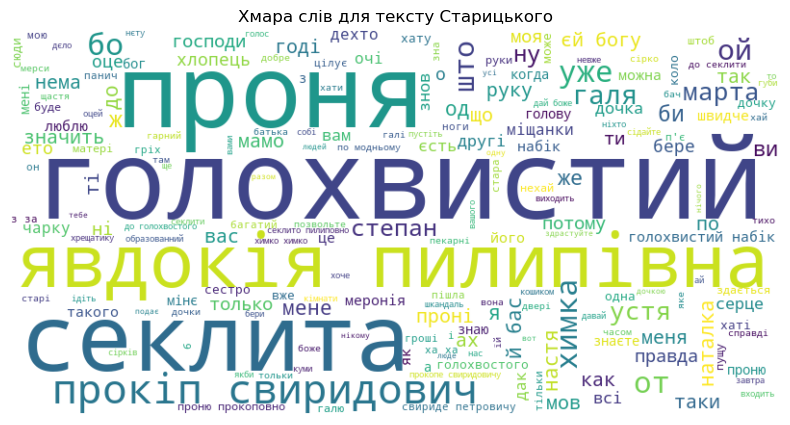

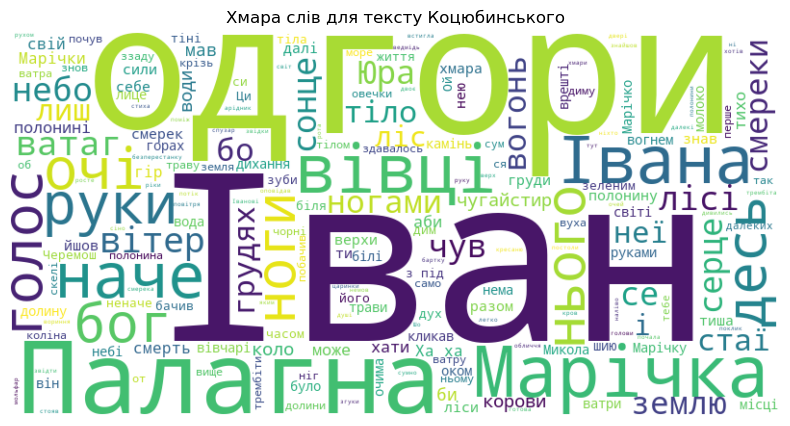

In [31]:
# Plot word cloud for Staritsky's text
plot_cloud(staritsky_text, "Хмара слів для тексту Старицького")

# Plot word cloud for Kotsiubynsky's text
plot_cloud(kotsiubynsky_text, "Хмара слів для тексту Коцюбинського")

<h2>Виконала студентка групи ІП-21 <br> Гордич Оксана</h2>
